In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

# Background

The data was obtained directly from Spotify by making requests. One of them is the Streaming History. Then, acquired several related pieces of data such as Decades, Duration, Genre, Mood, Popularity, and Styles from http://organizeyourmusic.playlistmachinery.com/ on my personal account

The purpose of this analysis is to examine music preferences based on the dataset I obtained directly from Spotify

# Importing Files

In [2]:
decades = pd.read_csv('Decades - Decades.csv')
duration = pd.read_csv('Duration - Duration.csv')
genre_df = pd.read_csv('genre analytics2 - Genres.csv')
popularity = pd.read_csv('Popularity - Popularity.csv')
styles = pd.read_csv('Styles - Styles.csv')
streaming0 = pd.read_csv('StreamingHistory0.csv')
streaming1 =pd.read_csv('StreamingHistory1.csv')

In [3]:
file_paths = [
    "Decades - Decades.csv",
    "Duration - Duration.csv",
    "genre analytics2 - Genres.csv",
    "Mood Analytics - Moods.csv",
    "Popularity - Popularity.csv",
    "StreamingHistory0.csv",
    "StreamingHistory1.csv",
    "Styles - Styles.csv",
]

In [4]:
directory_path = r"C:\Users\Gal\Desktop\POSTING"

In [5]:
data_preview = {}
for file_path in file_paths:
    full_path = os.path.join(directory_path, file_path)
    data_preview[file_path] = pd.read_csv(full_path).head()

print(data_preview)


{'Decades - Decades.csv':                                        title           artist  \
0                                 Selir Hati        T.R.I.A.D   
1                           Where Is My Mind    Maxence Cyrin   
2  Club Can't Handle Me (feat. David Guetta)         Flo Rida   
3                                  Celestica  Crystal Castles   
4                              Midnight City              M83   

               top genre  year       added  bpm  nrgy  dnce  dB  live  val  \
0    indonesian pop rock  2010  2022‑08‑13   83    78    64  -5    28   72   
1  compositional ambient  2010  2022‑10‑31  142    11    33 -21    12    6   
2              dance pop  2010  2021‑07‑07  128    87    62  -4     6   47   
3      alternative dance  2010  2021‑11‑27  126    70    55  -6    12   30   
4        french shoegaze  2011  2020‑12‑03  105    73    51  -5     7   27   

   dur  acous  spch  pop decades  
0  245      6     3   66   2010s  
1  165     91     5   64   2010s  
2  235   

### Data Overview

In [6]:
decades

,title,artist,top genre,year,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,decades
0,Selir Hati,T.R.I.A.D,indonesian pop rock,2010,2022‑08‑13,83,78,64,-5,28,72,245,6,3,66,2010s
1,Where Is My Mind,Maxence Cyrin,compositional ambient,2010,2022‑10‑31,142,11,33,-21,12,6,165,91,5,64,2010s
2,Club Can't Handle Me (feat. David Guetta),Flo Rida,dance pop,2010,2021‑07‑07,128,87,62,-4,6,47,235,3,3,79,2010s
3,Celestica,Crystal Castles,alternative dance,2010,2021‑11‑27,126,70,55,-6,12,30,228,2,3,56,2010s
4,Midnight City,M83,french shoegaze,2011,2020‑12‑03,105,73,51,-5,7,27,244,2,4,81,2010s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,Night Cruising,Momoko Kikuchi,classic city pop,1986,2022‑08‑14,96,73,62,-7,8,74,302,33,3,39,1980s
527,Imagine - Remastered 2010,John Lennon,beatlesque,1971,2023‑03‑04,76,26,55,-12,9,17,188,91,3,79,1970s
528,心の友,Mayumi Itsuwa,japanese singer-songwriter,1972,2021‑06‑27,96,20,56,-20,9,41,196,70,3,47,1970s
529,Dancing Queen,ABBA,europop,1976,2020‑12‑06,101,87,54,-7,79,75,230,36,4,86,1970s


Berisi informasi tentang judul lagu, artis, genre teratas, tahun rilis, tanggal ditambahkan ke playlist, BPM, energi, danceability, dB, live, valence, durasi, akustik, speechiness, popularitas, dan dekade

In [7]:
decades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531 entries, 0 to 530
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      530 non-null    object
 1   artist     530 non-null    object
 2   top genre  491 non-null    object
 3   year       531 non-null    int64 
 4   added      531 non-null    object
 5   bpm        531 non-null    int64 
 6   nrgy       531 non-null    int64 
 7   dnce       531 non-null    int64 
 8   dB         531 non-null    int64 
 9   live       531 non-null    int64 
 10  val        531 non-null    int64 
 11  dur        531 non-null    int64 
 12  acous      531 non-null    int64 
 13  spch       531 non-null    int64 
 14  pop        531 non-null    int64 
 15  decades    531 non-null    object
dtypes: int64(11), object(5)
memory usage: 66.5+ KB


Sebagian besar data decades berbentuk int dan sisanya object. Terdapat kolom 'top genre' memiliki 40 baris yang kosong (missing value).

In [8]:
duration

,title,artist,top genre,year,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,duration category
0,See You Again (feat. Kali Uchis),"Tyler, The Creator",hip hop,2017,2020‑02‑25,79,56,56,-9,11,62,180,37,10,93,medium
1,I Am on My Way,Riverwave,future funk,2019,2020‑01‑20,170,62,50,-8,63,26,181,28,3,5,medium
2,belas,eevee,japanese chillhop,2017,2023‑08‑14,148,20,81,-17,11,60,182,29,19,45,medium
3,Ocarina,TV Blonde,NaN,2017,2022‑09‑16,138,73,40,-6,45,5,182,31,4,40,medium
4,Van Gogh,Virginio Aiello,pianissimo,2021,2021‑12‑07,97,2,24,-28,11,8,183,95,4,63,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,The Girl Next Door,Tomppabeats,chillhop,2016,2023‑08‑14,75,36,66,-13,33,88,51,72,68,52,very short
355,You're Cute,Tomppabeats,chillhop,2016,2023‑08‑14,78,26,73,-16,9,28,61,81,6,46,very short
356,NOStalgia,TOKYOPILL,chill breakcore,2021,2022‑04‑11,83,58,41,-10,87,48,62,67,61,27,very short
357,If Only,Rook1e,lo-fi beats,2017,2023‑08‑14,72,11,56,-15,11,33,67,98,10,48,very short


Berisi informasi tentang judul lagu, artis, genre teratas, tahun rilis, tanggal ditambahkan, BPM, energi, danceability, dB, live, valence, durasi, akustik, speechiness, dan popularitas

In [9]:
duration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              358 non-null    object
 1   artist             358 non-null    object
 2   top genre          333 non-null    object
 3   year               359 non-null    int64 
 4   added              359 non-null    object
 5   bpm                359 non-null    int64 
 6   nrgy               359 non-null    int64 
 7   dnce               359 non-null    int64 
 8   dB                 359 non-null    int64 
 9   live               359 non-null    int64 
 10  val                359 non-null    int64 
 11  dur                359 non-null    int64 
 12  acous              359 non-null    int64 
 13  spch               359 non-null    int64 
 14  pop                359 non-null    int64 
 15  duration category  359 non-null    object
dtypes: int64(11), object(5)
memory usage: 45.0+ 

In [10]:
duration.loc[duration[['title','artist','top genre']].isna().any(axis=1)]

,title,artist,top genre,year,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,duration category
3,Ocarina,TV Blonde,NaN,2017,2022‑09‑16,138,73,40,-6,45,5,182,31,4,40,medium
11,whispering,manleydown,NaN,2019,2023‑08‑14,100,40,75,-12,36,61,186,84,5,36,medium
30,JFLA - A COLORS SHOW,Sally,NaN,2019,2020‑11‑28,140,36,71,-11,8,10,196,39,5,28,medium
45,Anastasia,DJ.Stevanus,NaN,2001,2021‑06‑18,180,83,49,-12,8,35,206,0,5,3,medium
52,Shut Me Down,Haute,NaN,2017,2020‑02‑10,119,63,75,-5,51,49,210,16,4,35,medium
57,Resonance,Home,NaN,2014,2019‑12‑16,170,74,57,-9,22,36,213,4,6,74,medium
84,I will always love you (Saxophone),Mytza Handbalistu,NaN,2021,2022‑04‑25,135,44,45,-6,8,15,226,81,3,18,medium
98,Chopin - Nocturne Op. 9 No. 2 In E Flat Major,PianoDreams,NaN,2014,2021‑06‑22,122,13,52,-21,12,20,234,98,5,51,medium
155,San Francisco Street,Sun Rai,NaN,2013,2022‑12‑16,111,54,88,-9,9,51,267,22,4,61,medium
180,Melayang,January Christy,NaN,1986,2021‑12‑02,142,64,70,-7,22,67,286,51,5,38,medium


Terdapat missing value pada kolom title, artist, top genre. Untuk tahap selanjutnya, baris yang memiliki missing value akan tidak proses (ignore)

In [11]:
genre_df

,title,artist,top genre,year,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,2:59,chief.,lo-fi beats,2017,2023‑08‑14,79,17,39,-12,8,8,122,80,11,37
1,17:32,The Deli,chillhop,2016,2023‑08‑14,86,19,69,-14,8,55,137,69,5,64
2,A Night Together,Kudasaibeats,lo-fi beats,2017,2023‑08‑14,164,61,57,-15,10,53,192,93,5,39
3,Affection,Jinsang,chillhop,2016,2023‑08‑14,84,19,70,-15,9,61,117,92,9,64
4,Attached,Kudasaibeats,lo-fi beats,2017,2023‑08‑14,200,60,57,-19,9,12,163,90,10,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,Menunggumu (Feat. Chrisye),Peterpan,dangdut koplo,2008,2023‑03‑12,77,75,46,-6,25,33,223,25,3,56
736,Diatas Normal,Peterpan,dangdut koplo,2008,2023‑03‑03,105,85,61,-5,20,84,216,4,3,41
737,It's Not So Bad,Dybbukk,sad lo-fi,2021,2022‑02‑11,137,42,74,-9,37,48,141,41,8,72
738,French,Verzache,lo-fi chill,2016,2020‑01‑13,130,34,82,-13,9,13,133,48,8,41


Berisi informasi tentang judul lagu, artis, genre teratas, tahun rilis, tanggal ditambahkan, BPM, energi, danceability, dB, live, valence, durasi, akustik, speechiness, popularitas, dan genre

In [12]:
genre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      740 non-null    object
 1   artist     740 non-null    object
 2   top genre  729 non-null    object
 3   year       740 non-null    int64 
 4   added      740 non-null    object
 5   bpm        740 non-null    int64 
 6   nrgy       740 non-null    int64 
 7   dnce       740 non-null    int64 
 8   dB         740 non-null    int64 
 9   live       740 non-null    int64 
 10  val        740 non-null    int64 
 11  dur        740 non-null    int64 
 12  acous      740 non-null    int64 
 13  spch       740 non-null    int64 
 14  pop        740 non-null    int64 
dtypes: int64(11), object(4)
memory usage: 86.8+ KB


Missing value terlihat pada kolom top genre

In [13]:
popularity

,title,artist,top genre,year,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,popularity category
0,Sunflower,Rex Orange County,bedroom pop,2017,2022‑05‑31,130,77,55,-4,52,57,252,65,5,75,very popular
1,Dangerous,Kardinal Offishall,canadian old school hip hop,2008,2023‑08‑01,117,79,95,-6,8,81,246,0,8,75,very popular
2,"I'll Be Missing You (feat. Faith Evans, 112)",Diddy,dance pop,2004,2023‑08‑02,110,48,86,-9,59,92,302,5,6,75,very popular
3,Pretty Girl,Clairo,bedroom pop,2017,2022‑10‑14,112,61,93,-4,6,70,178,59,4,74,very popular
4,Resonance,Home,NaN,2014,2019‑12‑16,170,74,57,-9,22,36,213,4,6,74,very popular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,Aquatic Interlude,internetBoi,phonk,2017,2020‑09‑10,120,63,43,-9,28,10,184,6,4,0,deep
360,Seperti Yang Kau Minta,Chrisye,indonesian city pop,2021,2022‑06‑22,171,45,40,-7,11,20,289,29,2,0,deep
361,Grape Soda,Rook1e,lo-fi beats,2018,2023‑08‑14,67,48,54,-9,18,68,104,33,6,0,deep
362,New Beginnings,Dream Easy Collective,lo-fi beats,2018,2023‑08‑14,118,45,68,-12,8,19,114,92,18,0,deep


Berisi informasi serupa dengan file lainnya, tetapi juga mencakup kolom popularity category

In [14]:
popularity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                363 non-null    object
 1   artist               363 non-null    object
 2   top genre            337 non-null    object
 3   year                 364 non-null    int64 
 4   added                364 non-null    object
 5   bpm                  364 non-null    int64 
 6   nrgy                 364 non-null    int64 
 7   dnce                 364 non-null    int64 
 8   dB                   364 non-null    int64 
 9   live                 364 non-null    int64 
 10  val                  364 non-null    int64 
 11  dur                  364 non-null    int64 
 12  acous                364 non-null    int64 
 13  spch                 364 non-null    int64 
 14  pop                  364 non-null    int64 
 15  popularity category  364 non-null    object
dtypes: int64

Missing value terlihat pada kolom title, artist, top genre. Dan jumlah baris berbeda dengan data sebelumnya

In [15]:
styles

,title,artist,top genre,year,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,styles
0,ヘビーローテーション,AKB48,48g,2011,2023‑07‑20,178,93,32,-3,33,23,283,0,5,52,clean
1,Nop,ChenYueLong,NaN,2020,2023‑07‑15,138,28,70,-19,13,24,103,98,4,56,clean
2,Remember Summer Days,Anri,classic city pop,1983,2023‑04‑26,97,67,63,-5,7,79,296,34,3,64,clean
3,Long Kiss Good Bye,HALCALI,shibuya-kei,2008,2023‑04‑11,120,83,63,-4,40,57,243,0,3,45,clean
4,Hell In Cup,North Posse,phonk,2022,2023‑03‑18,159,85,79,-4,69,66,106,0,10,26,clean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Sober,Mahalia,alternative r&b,2017,2020‑02‑10,82,70,66,-5,10,61,266,34,38,57,loud
656,Terbang Bersamaku,Kangen Band,indonesian pop,2009,2023‑08‑16,120,67,77,-5,9,82,241,14,5,60,loud
657,I Follow You,Melody's Echo Chamber,dream pop,2012,2022‑09‑12,100,78,41,-5,23,73,216,2,3,49,loud
658,Remember Summer Days (Night Tempo Showa Groove...,Night Tempo,denpa-kei,2019,2022‑09‑18,110,87,69,-5,84,72,227,49,47,52,loud


Berisi informasi tentang judul lagu, artis, genre teratas, tahun rilis, tanggal ditambahkan, BPM, energi, danceability, dB, live, valence, durasi, akustik, speechiness, popularitas, dan style musik / selera musik

In [16]:
styles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      659 non-null    object
 1   artist     659 non-null    object
 2   top genre  600 non-null    object
 3   year       660 non-null    int64 
 4   added      660 non-null    object
 5   bpm        660 non-null    int64 
 6   nrgy       660 non-null    int64 
 7   dnce       660 non-null    int64 
 8   dB         660 non-null    int64 
 9   live       660 non-null    int64 
 10  val        660 non-null    int64 
 11  dur        660 non-null    int64 
 12  acous      660 non-null    int64 
 13  spch       660 non-null    int64 
 14  pop        660 non-null    int64 
 15  styles     660 non-null    object
dtypes: int64(11), object(5)
memory usage: 82.6+ KB


Beberapa kolom juga memiliki missing value dan jumlah baris yang tidak identik dengan sebelumnya

In [17]:
streaming0

,endTime,artistName,trackName,msPlayed
0,2022-08-14 08:07,omarr,Warm Thoughts,103050
1,2022-08-15 10:04,T.R.I.A.D,Selir Hati,2737
2,2022-08-15 12:54,Freddie Dredd,Doomset,124373
3,2022-08-16 02:33,CoryaYo,Easylike,92160
4,2022-08-16 02:35,TOKYOPILL,Cyber Psyche Green,139636
...,...,...,...,...
9995,2023-01-11 10:30,Skrillex,Rumble,146571
9996,2023-01-11 10:33,Skrillex,Rumble,146571
9997,2023-01-11 10:35,Skrillex,Rumble,146571
9998,2023-01-11 10:37,Skrillex,Rumble,146571


Berisi riwayat streaming dengan informasi tentang waktu berakhir, nama artis, nama lagu, dan milidetik yang diputar.

In [18]:
streaming0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     10000 non-null  object
 1   artistName  10000 non-null  object
 2   trackName   10000 non-null  object
 3   msPlayed    10000 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


Tidak terdapat baris yang kosong pada streaming0

In [19]:
streaming1

,endTime,artistName,trackName,msPlayed
0,2022-08-14 08:07,omarr,Warm Thoughts,103050
1,2022-08-15 10:04,T.R.I.A.D,Selir Hati,2737
2,2022-08-15 12:54,Freddie Dredd,Doomset,124373
3,2022-08-16 02:33,CoryaYo,Easylike,92160
4,2022-08-16 02:35,TOKYOPILL,Cyber Psyche Green,139636
...,...,...,...,...
9995,2023-01-11 10:30,Skrillex,Rumble,146571
9996,2023-01-11 10:33,Skrillex,Rumble,146571
9997,2023-01-11 10:35,Skrillex,Rumble,146571
9998,2023-01-11 10:37,Skrillex,Rumble,146571


In [20]:
streaming1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     10000 non-null  object
 1   artistName  10000 non-null  object
 2   trackName   10000 non-null  object
 3   msPlayed    10000 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


Data streaming1 memiliki kesamaan pada struktur dan tidak ada missing value di tiap baris, maka dari itu kedua data tersebut bisa digabungkan

# Data Preprocessing

In [21]:
def merge_data(streaming_history, other_data):
    for data in other_data:
        common_columns = set(streaming_history.columns) & set(data.columns)
        if common_columns:
            streaming_history = pd.merge(
                streaming_history, data, left_on=list(common_columns), right_on=list(common_columns), how="left"
            )
    return streaming_history

In [22]:
directory_path = r"C:\Users\Gal\Desktop\POSTING"
file_paths = ["StreamingHistory0.csv", "StreamingHistory1.csv"]

In [23]:
streaming_history = pd.concat(
    [pd.read_csv(os.path.join(directory_path, file_path)) for file_path in file_paths],
    ignore_index=True
)

In [24]:
streaming_history

,endTime,artistName,trackName,msPlayed
0,2022-08-14 08:07,omarr,Warm Thoughts,103050
1,2022-08-15 10:04,T.R.I.A.D,Selir Hati,2737
2,2022-08-15 12:54,Freddie Dredd,Doomset,124373
3,2022-08-16 02:33,CoryaYo,Easylike,92160
4,2022-08-16 02:35,TOKYOPILL,Cyber Psyche Green,139636
...,...,...,...,...
19995,2023-01-11 10:30,Skrillex,Rumble,146571
19996,2023-01-11 10:33,Skrillex,Rumble,146571
19997,2023-01-11 10:35,Skrillex,Rumble,146571
19998,2023-01-11 10:37,Skrillex,Rumble,146571


In [25]:
streaming_history.rename(columns={"artistName": "artist", "trackName": "title"}, inplace=True)

In [26]:
api_data = [
    pd.read_csv(os.path.join(directory_path, file_path)) for file_path in [
        "Decades - Decades.csv",
        "Duration - Duration.csv",
        "genre analytics2 - Genres.csv",
        "Mood Analytics - Moods.csv",
        "Popularity - Popularity.csv",
        "Styles - Styles.csv",
    ]
]


In [27]:
api_data

[                                         title           artist  \
 0                                   Selir Hati        T.R.I.A.D   
 1                             Where Is My Mind    Maxence Cyrin   
 2    Club Can't Handle Me (feat. David Guetta)         Flo Rida   
 3                                    Celestica  Crystal Castles   
 4                                Midnight City              M83   
 ..                                         ...              ...   
 526                             Night Cruising   Momoko Kikuchi   
 527                  Imagine - Remastered 2010      John Lennon   
 528                                        心の友    Mayumi Itsuwa   
 529                              Dancing Queen             ABBA   
 530                                        甜蜜蜜      Teresa Teng   
 
                       top genre  year       added  bpm  nrgy  dnce  dB  live  \
 0           indonesian pop rock  2010  2022‑08‑13   83    78    64  -5    28   
 1         compositi

In [28]:
merged_df = merge_data(streaming_history, api_data)

In [29]:
merged_df

,endTime,artist,title,msPlayed,top genre,year,added,bpm,nrgy,dnce,...,val,dur,acous,spch,pop,decades,duration category,Moods,popularity category,styles
0,2022-08-14 08:07,omarr,Warm Thoughts,103050,focus beats,2019.0,2020‑02‑13,83.0,39.0,75.0,...,38.0,171.0,89.0,4.0,28.0,2010s,short,NaN,somewhat popular,clean
1,2022-08-14 08:07,omarr,Warm Thoughts,103050,focus beats,2019.0,2020‑02‑13,83.0,39.0,75.0,...,38.0,171.0,89.0,4.0,28.0,2010s,short,NaN,somewhat popular,quiet
2,2022-08-14 08:07,omarr,Warm Thoughts,103050,focus beats,2019.0,2020‑02‑13,83.0,39.0,75.0,...,38.0,171.0,89.0,4.0,28.0,2010s,short,NaN,somewhat popular,acoustic
3,2022-08-14 08:07,omarr,Warm Thoughts,103050,focus beats,2019.0,2020‑02‑13,83.0,39.0,75.0,...,38.0,171.0,89.0,4.0,28.0,present,short,NaN,somewhat popular,clean
4,2022-08-14 08:07,omarr,Warm Thoughts,103050,focus beats,2019.0,2020‑02‑13,83.0,39.0,75.0,...,38.0,171.0,89.0,4.0,28.0,present,short,NaN,somewhat popular,quiet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103357,2023-01-11 10:37,Skrillex,Rumble,146571,brostep,2023.0,2023‑01‑05,140.0,84.0,81.0,...,6.0,147.0,5.0,6.0,72.0,2020s,short,danceable,very popular,clean
103358,2023-01-11 10:40,Skrillex,Rumble,146571,brostep,2023.0,2023‑01‑05,140.0,84.0,81.0,...,6.0,147.0,5.0,6.0,72.0,2020s,short,amped,very popular,clean
103359,2023-01-11 10:40,Skrillex,Rumble,146571,brostep,2023.0,2023‑01‑05,140.0,84.0,81.0,...,6.0,147.0,5.0,6.0,72.0,2020s,short,danceable,very popular,clean
103360,2023-01-11 10:40,Skrillex,Rumble,146571,brostep,2023.0,2023‑01‑05,140.0,84.0,81.0,...,6.0,147.0,5.0,6.0,72.0,2020s,short,amped,very popular,clean


In [30]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103362 entries, 0 to 103361
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   endTime              103362 non-null  object 
 1   artist               103362 non-null  object 
 2   title                103362 non-null  object 
 3   msPlayed             103362 non-null  int64  
 4   top genre            96658 non-null   object 
 5   year                 100112 non-null  float64
 6   added                100112 non-null  object 
 7   bpm                  100112 non-null  float64
 8   nrgy                 100112 non-null  float64
 9   dnce                 100112 non-null  float64
 10  dB                   100112 non-null  float64
 11  live                 100112 non-null  float64
 12  val                  100112 non-null  float64
 13  dur                  100112 non-null  float64
 14  acous                100112 non-null  float64
 15  spch             

Data streaming history dan api_data berhasil digabungkan. Saat ini memiliki 103362 baris yang diikuti 22 kolom. Tahap selanjutnya ada mengecek apakah terdapat duplikasi data

In [31]:
merged_df[merged_df.duplicated()]

,endTime,artist,title,msPlayed,top genre,year,added,bpm,nrgy,dnce,...,val,dur,acous,spch,pop,decades,duration category,Moods,popularity category,styles
7,2022-08-15 10:04,T.R.I.A.D,Selir Hati,2737,indonesian pop rock,2010.0,2022‑08‑13,83.0,78.0,64.0,...,72.0,245.0,6.0,3.0,66.0,2010s,medium,NaN,very popular,clean
8,2022-08-15 10:04,T.R.I.A.D,Selir Hati,2737,indonesian pop rock,2010.0,2022‑08‑13,83.0,78.0,64.0,...,72.0,245.0,6.0,3.0,66.0,2010s,medium,NaN,very popular,clean
13,2022-08-15 12:54,Freddie Dredd,Doomset,124373,aesthetic rap,2021.0,2022‑07‑23,125.0,86.0,84.0,...,85.0,154.0,6.0,6.0,45.0,2020s,short,amped,somewhat popular,explicit
14,2022-08-15 12:54,Freddie Dredd,Doomset,124373,aesthetic rap,2021.0,2022‑07‑23,125.0,86.0,84.0,...,85.0,154.0,6.0,6.0,45.0,2020s,short,amped,somewhat popular,loud
15,2022-08-15 12:54,Freddie Dredd,Doomset,124373,aesthetic rap,2021.0,2022‑07‑23,125.0,86.0,84.0,...,85.0,154.0,6.0,6.0,45.0,2020s,short,danceable,somewhat popular,explicit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103357,2023-01-11 10:37,Skrillex,Rumble,146571,brostep,2023.0,2023‑01‑05,140.0,84.0,81.0,...,6.0,147.0,5.0,6.0,72.0,2020s,short,danceable,very popular,clean
103358,2023-01-11 10:40,Skrillex,Rumble,146571,brostep,2023.0,2023‑01‑05,140.0,84.0,81.0,...,6.0,147.0,5.0,6.0,72.0,2020s,short,amped,very popular,clean
103359,2023-01-11 10:40,Skrillex,Rumble,146571,brostep,2023.0,2023‑01‑05,140.0,84.0,81.0,...,6.0,147.0,5.0,6.0,72.0,2020s,short,danceable,very popular,clean
103360,2023-01-11 10:40,Skrillex,Rumble,146571,brostep,2023.0,2023‑01‑05,140.0,84.0,81.0,...,6.0,147.0,5.0,6.0,72.0,2020s,short,amped,very popular,clean


Terdapat 75431 baris dan 22 kolom duplicate

In [32]:
merged_df.drop_duplicates(inplace=True)

In [33]:
merged_df[merged_df.duplicated()]

,endTime,artist,title,msPlayed,top genre,year,added,bpm,nrgy,dnce,...,val,dur,acous,spch,pop,decades,duration category,Moods,popularity category,styles


In [34]:
merged_df

,endTime,artist,title,msPlayed,top genre,year,added,bpm,nrgy,dnce,...,val,dur,acous,spch,pop,decades,duration category,Moods,popularity category,styles
0,2022-08-14 08:07,omarr,Warm Thoughts,103050,focus beats,2019.0,2020‑02‑13,83.0,39.0,75.0,...,38.0,171.0,89.0,4.0,28.0,2010s,short,NaN,somewhat popular,clean
1,2022-08-14 08:07,omarr,Warm Thoughts,103050,focus beats,2019.0,2020‑02‑13,83.0,39.0,75.0,...,38.0,171.0,89.0,4.0,28.0,2010s,short,NaN,somewhat popular,quiet
2,2022-08-14 08:07,omarr,Warm Thoughts,103050,focus beats,2019.0,2020‑02‑13,83.0,39.0,75.0,...,38.0,171.0,89.0,4.0,28.0,2010s,short,NaN,somewhat popular,acoustic
3,2022-08-14 08:07,omarr,Warm Thoughts,103050,focus beats,2019.0,2020‑02‑13,83.0,39.0,75.0,...,38.0,171.0,89.0,4.0,28.0,present,short,NaN,somewhat popular,clean
4,2022-08-14 08:07,omarr,Warm Thoughts,103050,focus beats,2019.0,2020‑02‑13,83.0,39.0,75.0,...,38.0,171.0,89.0,4.0,28.0,present,short,NaN,somewhat popular,quiet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51670,2023-01-11 10:35,Skrillex,Rumble,146571,brostep,2023.0,2023‑01‑05,140.0,84.0,81.0,...,6.0,147.0,5.0,6.0,72.0,2020s,short,danceable,very popular,clean
51673,2023-01-11 10:37,Skrillex,Rumble,146571,brostep,2023.0,2023‑01‑05,140.0,84.0,81.0,...,6.0,147.0,5.0,6.0,72.0,2020s,short,amped,very popular,clean
51674,2023-01-11 10:37,Skrillex,Rumble,146571,brostep,2023.0,2023‑01‑05,140.0,84.0,81.0,...,6.0,147.0,5.0,6.0,72.0,2020s,short,danceable,very popular,clean
51677,2023-01-11 10:40,Skrillex,Rumble,146571,brostep,2023.0,2023‑01‑05,140.0,84.0,81.0,...,6.0,147.0,5.0,6.0,72.0,2020s,short,amped,very popular,clean


Setelah menghapus baris duplicate, data sementara saat ini memiliki 27931 baris dan 22 kolom

In [35]:
# diketahui kolom endTime masih berbentuk object. Hal ini perlu dikonversikan ke bentuk datetime
merged_df['endTime'].dtypes

dtype('O')

In [36]:
merged_df['endTime'] = pd.to_datetime(merged_df['endTime'])

In [37]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27931 entries, 0 to 51678
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   endTime              27931 non-null  datetime64[ns]
 1   artist               27931 non-null  object        
 2   title                27931 non-null  object        
 3   msPlayed             27931 non-null  int64         
 4   top genre            24579 non-null  object        
 5   year                 26306 non-null  float64       
 6   added                26306 non-null  object        
 7   bpm                  26306 non-null  float64       
 8   nrgy                 26306 non-null  float64       
 9   dnce                 26306 non-null  float64       
 10  dB                   26306 non-null  float64       
 11  live                 26306 non-null  float64       
 12  val                  26306 non-null  float64       
 13  dur                  26306 non-

In [38]:
merged_df

,endTime,artist,title,msPlayed,top genre,year,added,bpm,nrgy,dnce,...,val,dur,acous,spch,pop,decades,duration category,Moods,popularity category,styles
0,2022-08-14 08:07:00,omarr,Warm Thoughts,103050,focus beats,2019.0,2020‑02‑13,83.0,39.0,75.0,...,38.0,171.0,89.0,4.0,28.0,2010s,short,NaN,somewhat popular,clean
1,2022-08-14 08:07:00,omarr,Warm Thoughts,103050,focus beats,2019.0,2020‑02‑13,83.0,39.0,75.0,...,38.0,171.0,89.0,4.0,28.0,2010s,short,NaN,somewhat popular,quiet
2,2022-08-14 08:07:00,omarr,Warm Thoughts,103050,focus beats,2019.0,2020‑02‑13,83.0,39.0,75.0,...,38.0,171.0,89.0,4.0,28.0,2010s,short,NaN,somewhat popular,acoustic
3,2022-08-14 08:07:00,omarr,Warm Thoughts,103050,focus beats,2019.0,2020‑02‑13,83.0,39.0,75.0,...,38.0,171.0,89.0,4.0,28.0,present,short,NaN,somewhat popular,clean
4,2022-08-14 08:07:00,omarr,Warm Thoughts,103050,focus beats,2019.0,2020‑02‑13,83.0,39.0,75.0,...,38.0,171.0,89.0,4.0,28.0,present,short,NaN,somewhat popular,quiet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51670,2023-01-11 10:35:00,Skrillex,Rumble,146571,brostep,2023.0,2023‑01‑05,140.0,84.0,81.0,...,6.0,147.0,5.0,6.0,72.0,2020s,short,danceable,very popular,clean
51673,2023-01-11 10:37:00,Skrillex,Rumble,146571,brostep,2023.0,2023‑01‑05,140.0,84.0,81.0,...,6.0,147.0,5.0,6.0,72.0,2020s,short,amped,very popular,clean
51674,2023-01-11 10:37:00,Skrillex,Rumble,146571,brostep,2023.0,2023‑01‑05,140.0,84.0,81.0,...,6.0,147.0,5.0,6.0,72.0,2020s,short,danceable,very popular,clean
51677,2023-01-11 10:40:00,Skrillex,Rumble,146571,brostep,2023.0,2023‑01‑05,140.0,84.0,81.0,...,6.0,147.0,5.0,6.0,72.0,2020s,short,amped,very popular,clean


### Gambaran Statistik Ringkas

In [39]:
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
msPlayed,27931.0,155673.999928,93577.906290,0.0,96026.0,157630.0,217894.0,724720.0
year,26306.0,2016.310652,4.955339,1972.0,2016.0,2017.0,2019.0,2023.0
bpm,26306.0,116.686535,34.478728,66.0,85.0,112.0,140.0,220.0
nrgy,26306.0,47.900479,25.306061,2.0,26.0,41.0,68.0,97.0
dnce,26306.0,63.129856,14.401958,6.0,55.0,66.0,73.0,93.0
dB,26306.0,-11.090626,5.026847,-28.0,-15.0,-11.0,-7.0,-2.0
live,26306.0,17.654565,16.716874,4.0,10.0,11.0,16.0,95.0
val,26306.0,41.431955,24.628329,3.0,20.0,38.0,64.0,96.0
dur,26306.0,190.283205,73.980836,51.0,130.0,184.0,243.0,575.0
acous,26306.0,53.929484,35.691013,0.0,14.0,61.0,86.0,99.0


### Gambaran Metadata

- msPlayed: Waktu yang diputar dalam milidetik, dengan rata-rata 155673.999928 ms dan rentang dari 0 hingga 724720 ms
- year: Tahun rilis lagu, dengan rata-rata sekitar tahun 2016 dan rentang dari tahun 1972 hingga tahun 2023
- bpm: Beats per minute, rata-rata sekitar 116 sekian dan rentang dari 66 hingga 220
- nrgy: Energi yang dikaitkan dengan lagu pada data, semakin tinggi semakin energik (cepat, keras)
- dnce: Danceability. Lagu yang memiliki danceability tinggi berarti lagu yang mudah untuk diiringi dengan bergoyang / 'jogetable'
- dB: Desibel adalah satuan untuk mengukur intensitas suara atau terkait kerasnya suara lagu tersebut
- live: Terkait keberadaan audiens dalam rekaman
- val: Valensi dalam konteks lagu yaitu jika lagu tersebut memiliki nilai valensi tinggi, maka suara dari lagu tersebut cenderung positif (happy, joyful)
- dur: Durasi dari setiap lagu
- acous: Nilai ini menggambarkan seberapa akustik sebuah lagu
- spch: Kata-kata yang diucapkan pada lagu. Semakin tinggi berarti lebih banyak kata yang diucapkan / lirik
- pop: Nilai popularitas dari lagu dan penyanyi. Semakin tinggi maka semakin populer

In [40]:
merged_df.isnull().sum()

endTime                    0
artist                     0
title                      0
msPlayed                   0
top genre               3352
year                    1625
added                   1625
bpm                     1625
nrgy                    1625
dnce                    1625
dB                      1625
live                    1625
val                     1625
dur                     1625
acous                   1625
spch                    1625
pop                     1625
decades                 1625
duration category       1625
Moods                  17917
popularity category     1625
styles                  1625
dtype: int64

Untuk missing value akan ditindaklanjuti dengan mengisi nilai median dari tiap-tiap nilai yang ada

# EDA

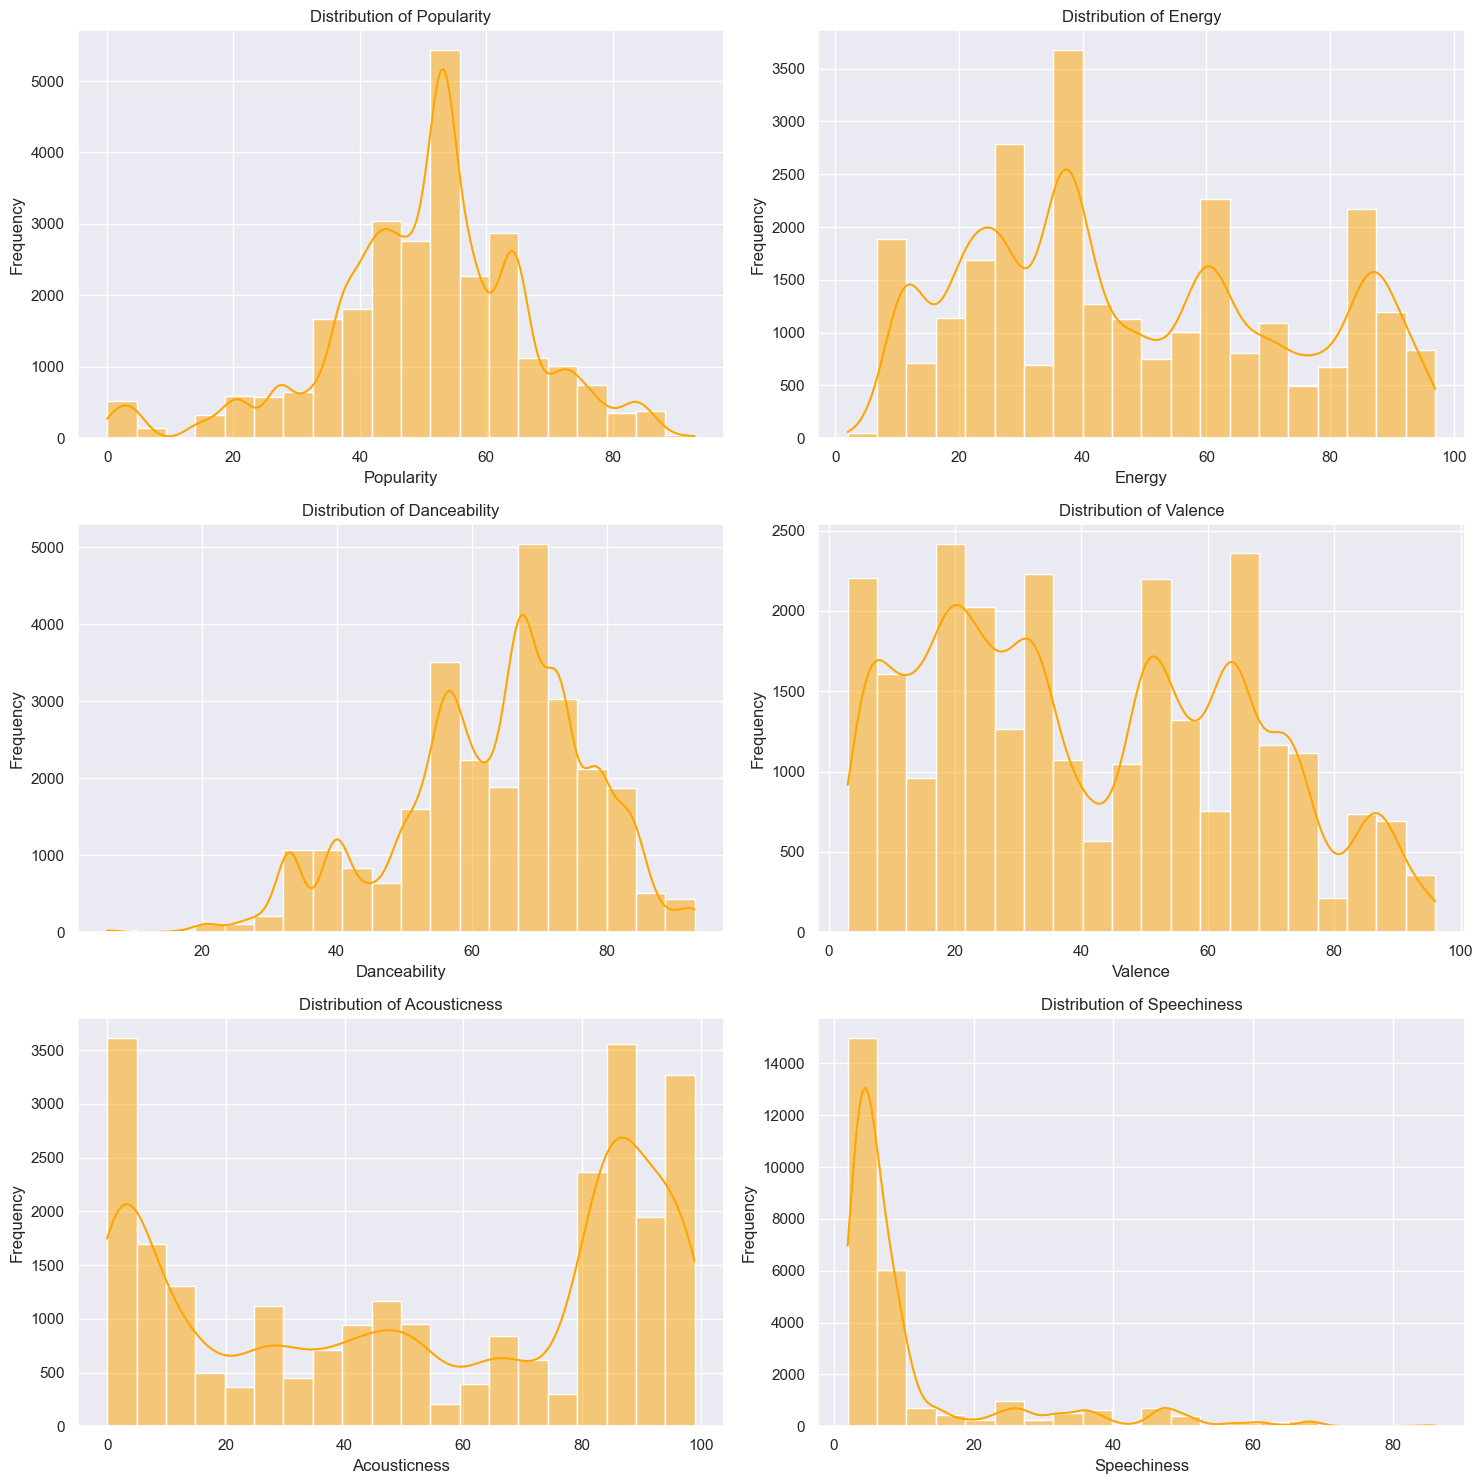

In [41]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

sns.histplot(merged_df['pop'], bins=20, kde=True, color='orange', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Popularity')
axes[0, 0].set_xlabel('Popularity')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(merged_df['nrgy'], bins=20, kde=True, color='orange', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Energy')
axes[0, 1].set_xlabel('Energy')
axes[0, 1].set_ylabel('Frequency')

sns.histplot(merged_df['dnce'], bins=20, kde=True, color='orange', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Danceability')
axes[1, 0].set_xlabel('Danceability')
axes[1, 0].set_ylabel('Frequency')

sns.histplot(merged_df['val'], bins=20, kde=True, color='orange', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Valence')
axes[1, 1].set_xlabel('Valence')
axes[1, 1].set_ylabel('Frequency')

sns.histplot(merged_df['acous'], bins=20, kde=True, color='orange', ax=axes[2, 0])
axes[2, 0].set_title('Distribution of Acousticness')
axes[2, 0].set_xlabel('Acousticness')
axes[2, 0].set_ylabel('Frequency')

sns.histplot(merged_df['spch'], bins=20, kde=True, color='orange', ax=axes[2, 1])
axes[2, 1].set_title('Distribution of Speechiness')
axes[2, 1].set_xlabel('Speechiness')
axes[2, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Kesimpulan Distribusi

- Popularity: Sebagian besar lagu memiliki skor popularitas di kisaran 40 hingga 60
- Energy: Distribusi energi menunjukkan bahwa ada banyak lagu dengan energi rendah (dibawah 50) dan sejumlah lagu dengan energi tinggi
- Danceability: Banyak lagu memiliki skor danceability di kisaran 60 hingga 80, menunjukkan tingkat keterdansaannya / berjoget yang tinggi
- Valence: Valence (kebahagiaan) lagu terdistribusi cukup merata, dengan puncak di sekitar 40
- Acousticness: Banyak lagu memiliki tingkat akustik yang tinggi, dengan puncak di sekitar 80-90
- Speechiness: Sebagian besar lagu memiliki tingkat speechiness yang rendah, dengan puncak di bawah 10

### Trend & Pattern Analysis: Top Songs & Artists Oftenly Listened to

In [42]:
# Songs
top_songs = merged_df.groupby(['title', 'artist'])['msPlayed'].sum().reset_index()
top_songs['minutesPlayed'] = top_songs['msPlayed'] / 60000 # convert ke menit
top_songs = top_songs.nlargest(10, 'minutesPlayed')

# Artists
top_artists = merged_df.groupby('artist')['msPlayed'].sum().reset_index()
top_artists['minutesPlayed'] = top_artists['msPlayed'] / 60000 # convert ke menit
top_artists = top_artists.nlargest(10, 'minutesPlayed')

In [43]:
top_songs

,title,artist,msPlayed,minutesPlayed
712,nagashi,Idealism,155912406,2598.540100
637,Where Is My Mind,Maxence Cyrin,146968488,2449.474800
307,Lake.Serene,Altitude.,144313944,2405.232400
460,Remember Summer Days (Night Tempo Showa Groove...,Night Tempo,121154372,2019.239533
401,Not Alone (ft. Jenn Champion),Lusine,85798680,1429.978000
583,The Girl I Haven't Met,Kudasaibeats,68245368,1137.422800
279,Just a Cloud,Lusine,61764020,1029.400333
469,Rumble,Skrillex,60154244,1002.570733
616,W.A.V.E (Bonus Track),Emil Rottmayer,60132608,1002.210133
480,Satu,Dewa,57839151,963.985850


- nagashi by Idealism: 2598.54 menit
- Where Is My Mind by Maxence Cyrin: 2449.47 menit
- Lake.Serene by Altitude.: 2405.23 menit
- Remember Summer Days (Night Tempo Showa Groove by Night Tempo: 2019.23 menit
- Not Alone (ft. Jenn Champion) by Lusine: 1429.97 menit
- The Girl I Haven't Met by Kudasaibeats: 1137.42 menit
- Just a Cloud by Lusine: 1029.40 menit
- Rumble by Skrillex: 1002.57 menit
- W.A.V.E (Bonus Track) by Emil Rottmayer: 1002.21 menit
- Satu by Dewa: 963.98 menit

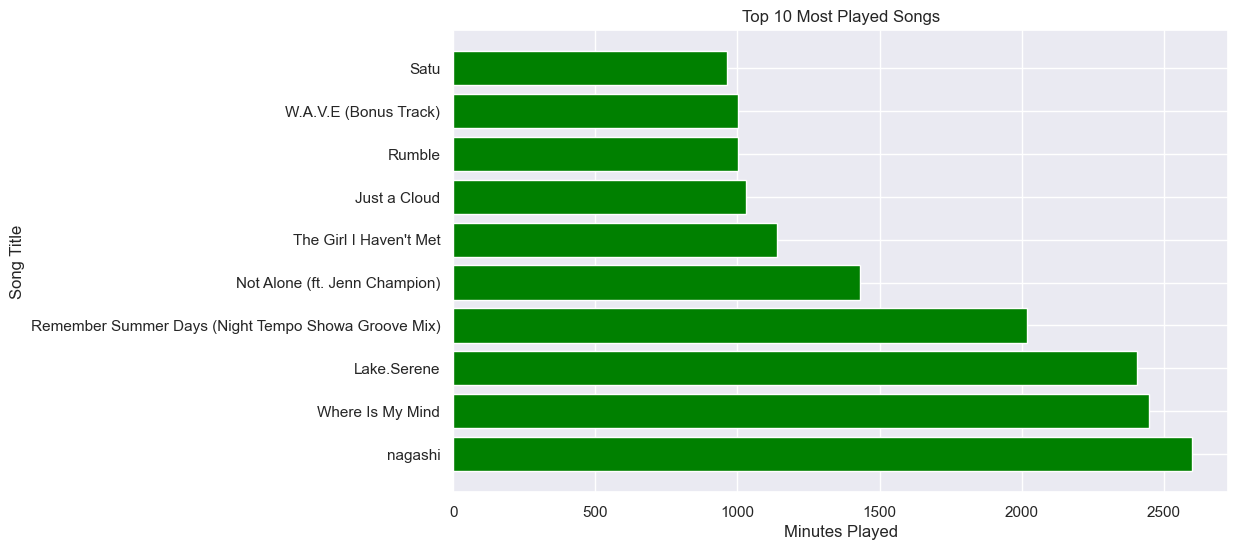

In [44]:
plt.figure(figsize=(10, 6))
plt.barh(top_songs['title'], top_songs['minutesPlayed'], color='green')
plt.xlabel('Minutes Played')
plt.ylabel('Song Title')
plt.title('Top 10 Most Played Songs')
plt.show()

In [45]:
top_artists

,artist,msPlayed,minutesPlayed
227,Night Tempo,265960407,4432.673450
165,Kudasaibeats,191522626,3192.043767
132,Idealism,156065588,2601.093133
186,Lusine,147562700,2459.378333
201,Maxence Cyrin,146968488,2449.474800
14,Altitude.,144322434,2405.373900
2,A L E X,99429612,1657.160200
396,憂鬱,93189936,1553.165600
70,Dewa,80063172,1334.386200
57,Crystal Castles,72524313,1208.738550


- Night Tempo: 4432.67 menit
- Kudasaibeats: 3192.04 menit
- Idealism: 2601.09 menit
- Lusine: 2459.37 menit
- Maxence Cyrin: 2449.47 menit
- Altitude.: 2405.37 menit
- A L E X: 1657.16 menit
- 憂鬱: 1553.16 menit
- Dewa: 1334.38 menit
- Crystal Castles: 1208.73

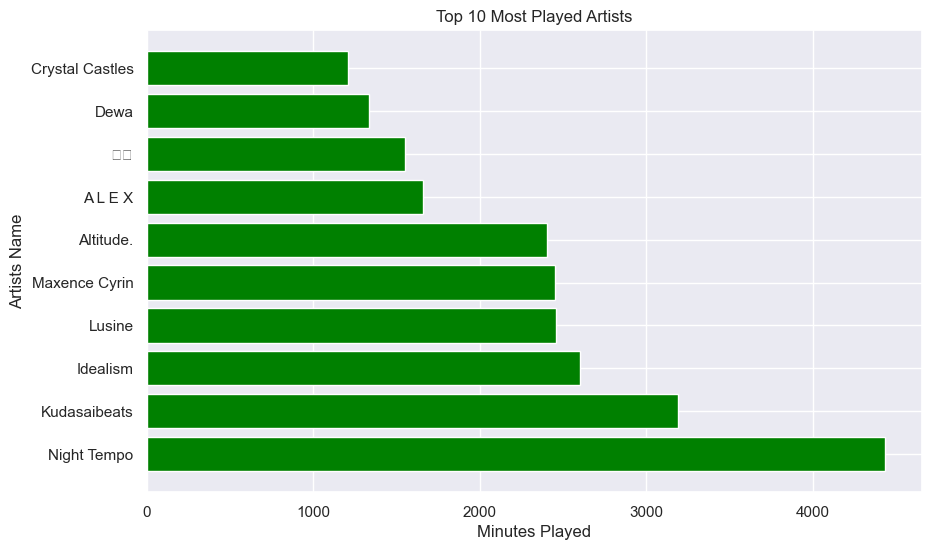

In [46]:
plt.figure(figsize=(10, 6))
plt.barh(top_artists['artist'], top_artists['minutesPlayed'], color='green')
plt.xlabel('Minutes Played')
plt.ylabel('Artists Name')
plt.title('Top 10 Most Played Artists')
plt.show()

### Pattern Analysis: Yearly, Monthly, Weekly, Daily

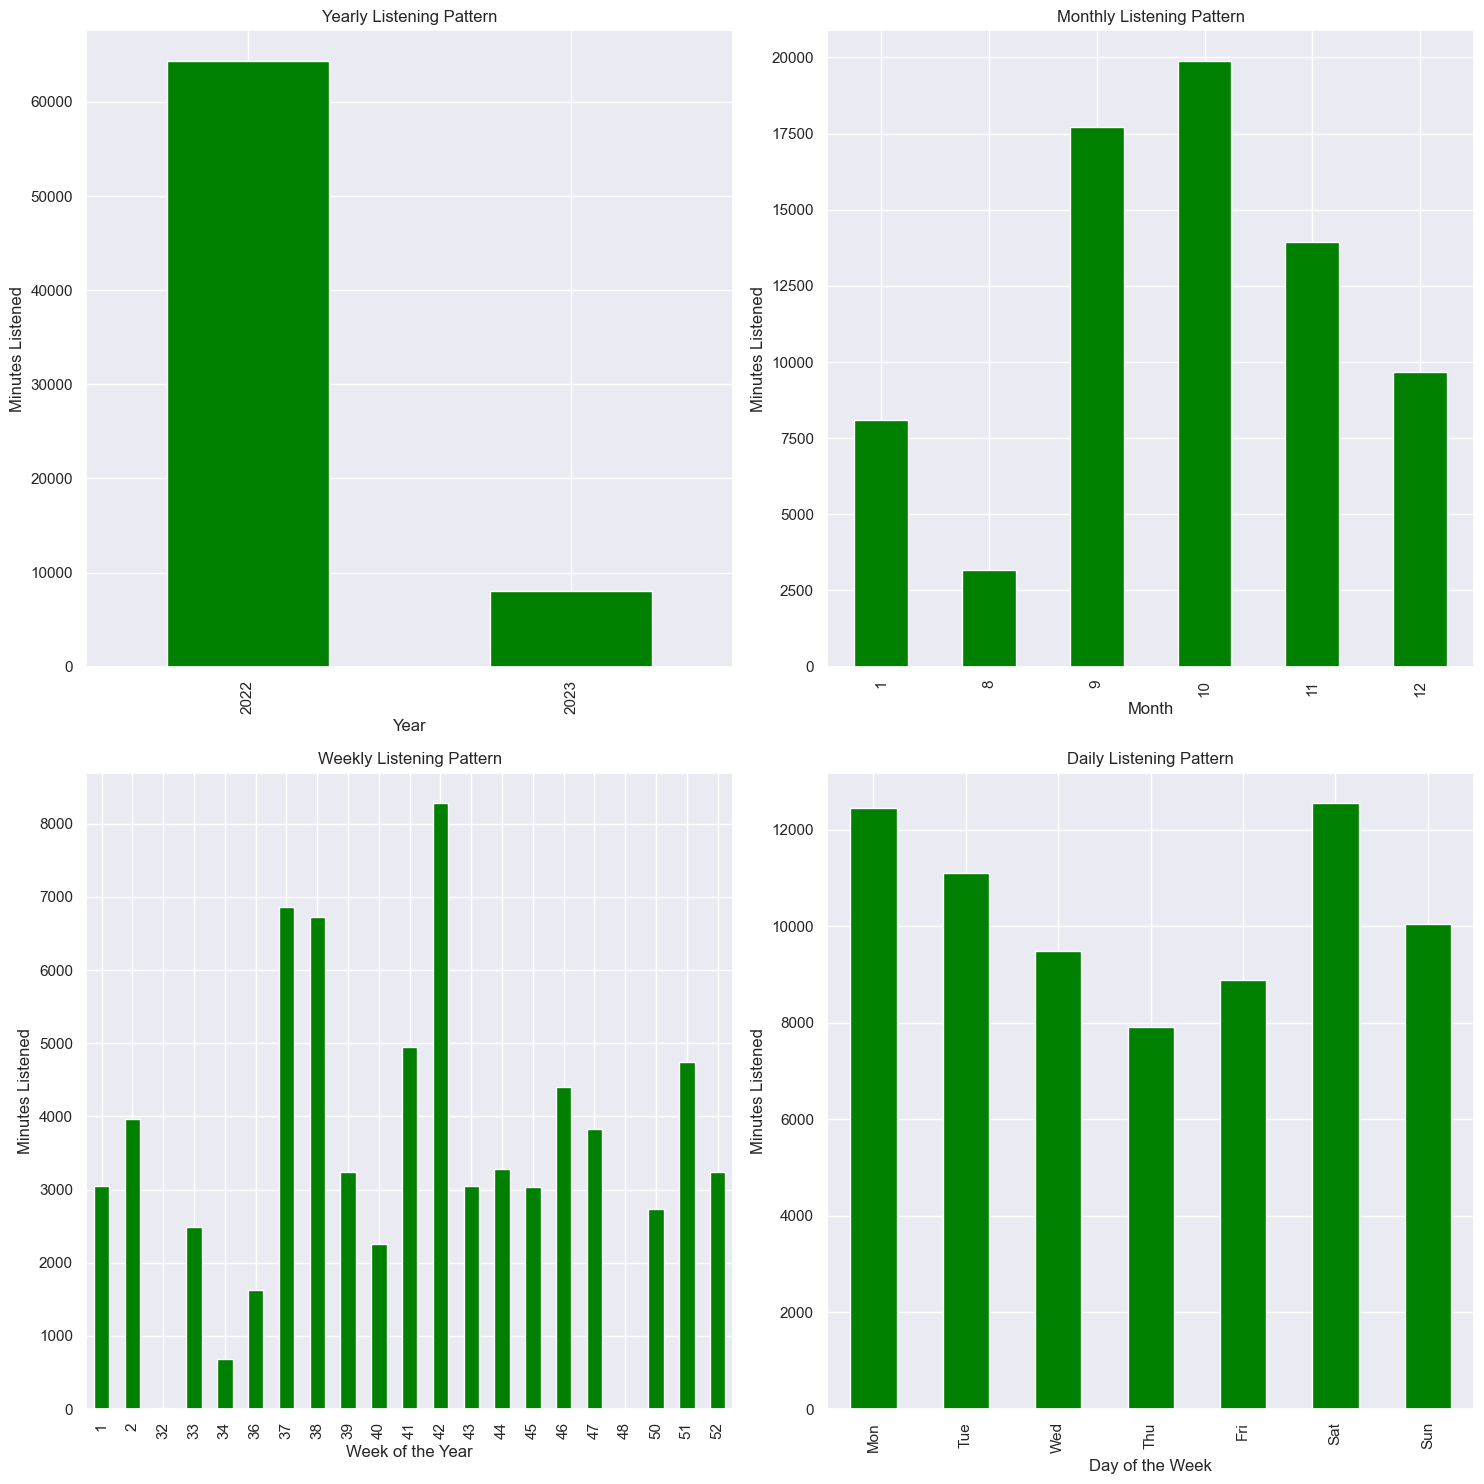

In [47]:
# Mengkonvert year, month, week, & day dari endTime
merged_df['year_listened'] = merged_df['endTime'].dt.year
merged_df['month_listened'] = merged_df['endTime'].dt.month
merged_df['week_listened'] = merged_df['endTime'].dt.isocalendar().week
merged_df['day_listened'] = merged_df['endTime'].dt.dayofweek

# Mengelompokkan data
yearly_listening = merged_df.groupby('year_listened')['msPlayed'].sum() / 60000 # Konversi ke menit
monthly_listening = merged_df.groupby('month_listened')['msPlayed'].sum() / 60000 # Konversi ke menit
weekly_listening = merged_df.groupby('week_listened')['msPlayed'].sum() / 60000 # Konversi ke menit
daily_listening = merged_df.groupby('day_listened')['msPlayed'].sum() / 60000 # Konversi ke menit

# Plot Chart
fig, axes = plt.subplots(2,2, figsize=(15, 15))

yearly_listening.plot(kind='bar', ax=axes[0, 0], color='green')
axes[0, 0].set_title('Yearly Listening Pattern')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Minutes Listened')

monthly_listening.plot(kind='bar', ax=axes[0, 1], color='green')
axes[0, 1].set_title('Monthly Listening Pattern')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Minutes Listened')

weekly_listening.plot(kind='bar', ax=axes[1, 0], color='green')
axes[1, 0].set_title('Weekly Listening Pattern')
axes[1, 0].set_xlabel('Week of the Year')
axes[1, 0].set_ylabel('Minutes Listened')

daily_listening.plot(kind='bar', ax=axes[1, 1], color='green')
axes[1, 1].set_title('Daily Listening Pattern')
axes[1, 1].set_xlabel('Day of the Week')
axes[1, 1].set_ylabel('Minutes Listened')
axes[1, 1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.tight_layout()
plt.show()

### Mood and Styles Analysis of The Songs Listened to

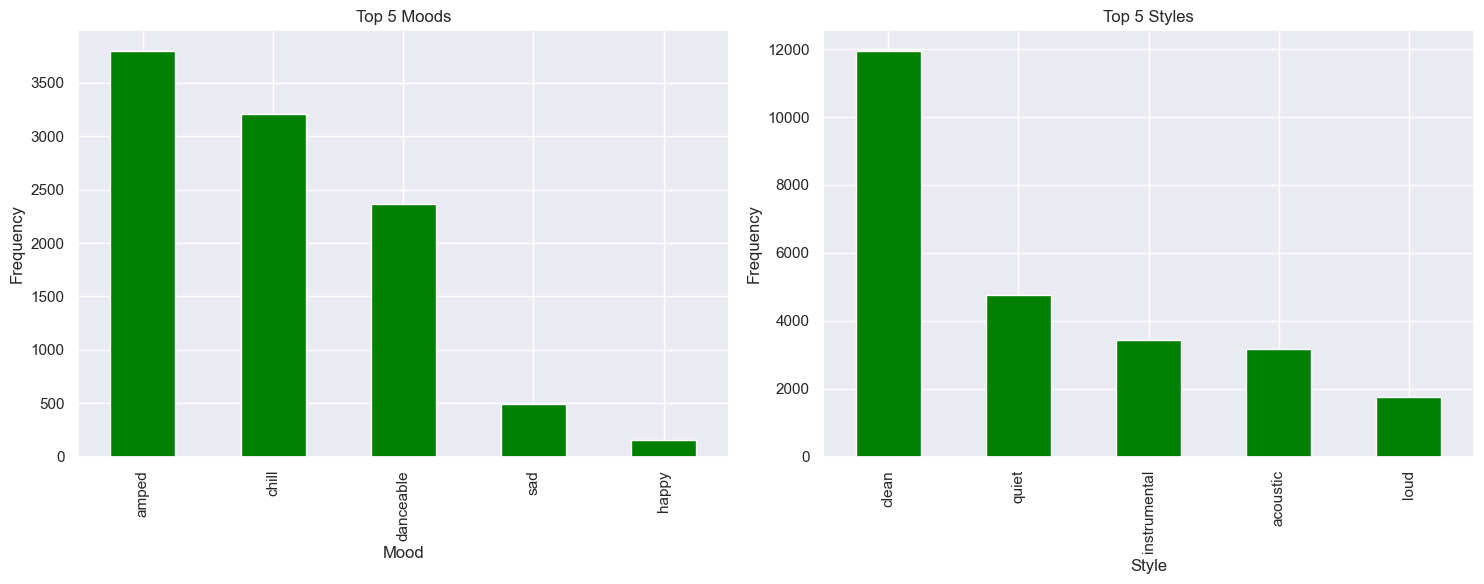

In [48]:
top_moods = merged_df['Moods'].value_counts().nlargest(5)
top_styles = merged_df['styles'].value_counts().nlargest(5)


fig, axes = plt.subplots(1, 2, figsize=(15, 6))

top_moods.plot(kind='bar', ax=axes[0], color='green')
axes[0].set_title('Top 5 Moods')
axes[0].set_xlabel('Mood')
axes[0].set_ylabel('Frequency')

top_styles.plot(kind='bar', ax=axes[1], color='green')
axes[1].set_title('Top 5 Styles')
axes[1].set_xlabel('Style')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Top 5 Moods:
- Amped - 3799 kali
- Chill - 3203 kali
- Danceable - 2361 kali
- Sad - 496 kali
- Happy - 155 kali

Top 5 Styles:
- Clean - 11.952 kali
- Quiet - 4757 kali
- Instrumental - 3431 kali
- Acoustic - 3180 kali
- Loud - 1760 kali

In [49]:
top_moods, top_styles

(amped        3799
 chill        3203
 danceable    2361
 sad           496
 happy         155
 Name: Moods, dtype: int64,
 clean           11952
 quiet            4757
 instrumental     3431
 acoustic         3180
 loud             1760
 Name: styles, dtype: int64)

### Distribution of songs by decades

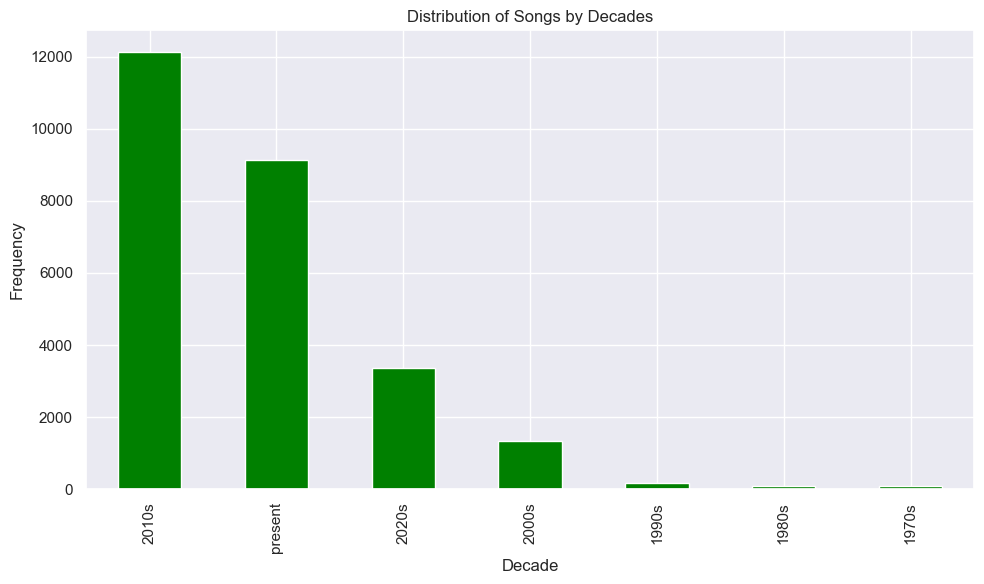

2010s      12123
present     9142
2020s       3358
2000s       1339
1990s        165
1980s         98
1970s         81
Name: decades, dtype: int64

In [50]:
decades_distribution = merged_df['decades'].value_counts()

plt.figure(figsize=(10, 6))
decades_distribution.plot(kind='bar', color='green')
plt.title('Distribution of Songs by Decades')
plt.xlabel('Decade')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

decades_distribution

### Top 10 Music Genres Listened to

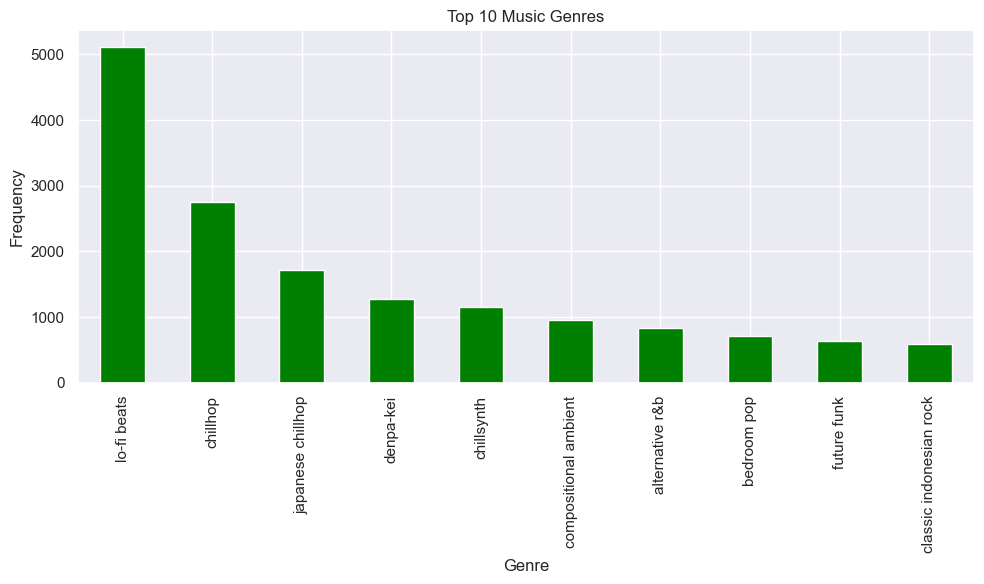

lo-fi beats                5110
chillhop                   2759
japanese chillhop          1716
denpa-kei                  1273
chillsynth                 1158
compositional ambient       960
alternative r&b             836
bedroom pop                 718
future funk                 637
classic indonesian rock     588
Name: top genre, dtype: int64

In [51]:
top_genres = merged_df['top genre'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
top_genres.plot(kind='bar', color='green')
plt.title('Top 10 Music Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

top_genres

# Songs Recommendation: Cosine Similarity

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

In [53]:
# Cek data variabel / fitur yang tersedia dari dataframe
available_features = merged_df.columns
available_features

Index(['endTime', 'artist', 'title', 'msPlayed', 'top genre', 'year', 'added',
       'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch',
       'pop', 'decades', 'duration category', 'Moods', 'popularity category',
       'styles', 'year_listened', 'month_listened', 'week_listened',
       'day_listened'],
      dtype='object')

In [54]:
features_for_recommendation = [
    'pop',
    'nrgy',
    'dnce',
    'dB',
    'val',
    'acous',
    'spch',
]


In [55]:
songs_features_df = merged_df.drop_duplicates(subset=['title', 'artist'])[features_for_recommendation + ['title', 'artist']]

In [56]:
scaler = StandardScaler()

In [57]:
# Input missing value dengan nilai media dari tiap fitur
songs_features_df[features_for_recommendation] = songs_features_df[features_for_recommendation].fillna(songs_features_df[features_for_recommendation].median())

# Normalisasi Data
scaled_features = scaler.fit_transform(songs_features_df[features_for_recommendation])

# Menghitung Cosine dengan data yang telah terskala
similarity_matrix = cosine_similarity(scaled_features)

similarity_matrix.shape, songs_features_df.head()


((778, 778),
      pop  nrgy  dnce    dB   val  acous  spch               title  \
 0   28.0  39.0  75.0 -13.0  38.0   89.0   4.0       Warm Thoughts   
 6   66.0  78.0  64.0  -5.0  72.0    6.0   3.0          Selir Hati   
 9   45.0  86.0  84.0  -3.0  85.0    6.0   6.0             Doomset   
 17  43.0  45.0  88.0 -10.0  63.0   70.0  19.0            Easylike   
 18  42.0  80.0  49.0  -6.0  34.0    7.0   9.0  Cyber Psyche Green   
 
            artist  
 0           omarr  
 6       T.R.I.A.D  
 9   Freddie Dredd  
 17        CoryaYo  
 18      TOKYOPILL  )

In [58]:
songs_features_df

,pop,nrgy,dnce,dB,val,acous,spch,title,artist
0,28.0,39.0,75.0,-13.0,38.0,89.0,4.0,Warm Thoughts,omarr
6,66.0,78.0,64.0,-5.0,72.0,6.0,3.0,Selir Hati,T.R.I.A.D
9,45.0,86.0,84.0,-3.0,85.0,6.0,6.0,Doomset,Freddie Dredd
17,43.0,45.0,88.0,-10.0,63.0,70.0,19.0,Easylike,CoryaYo
18,42.0,80.0,49.0,-6.0,34.0,7.0,9.0,Cyber Psyche Green,TOKYOPILL
...,...,...,...,...,...,...,...,...,...
51474,82.0,54.0,80.0,-6.0,39.0,20.0,4.0,Young Dumb & Broke,Khalid
51596,54.0,56.0,62.0,-9.0,41.0,30.0,5.0,Deritaku,David Bayu
51597,54.0,56.0,62.0,-9.0,41.0,30.0,5.0,Friends,levitation room
51623,54.0,56.0,62.0,-9.0,41.0,30.0,5.0,Tes petites fesses,LYNN


In [59]:
top_5_songs = merged_df.groupby(['title', 'artist'])['msPlayed'].sum().nlargest(5).reset_index()

In [60]:
# Mengatur ulang indeks dari songs_features_df untuk membuat pemetaan antara judul lagu dan indeks
songs_features_df.reset_index(drop=True, inplace=True)

# Membuat data dictionary untuk memetakan judul lagu ke indeksnya dalam matriks kemiripan
song_index_mapping = {row['title']: idx for idx, row in songs_features_df.iterrows()}

# Membuat Fungsi untuk mendapatkan rekomendasi judul lagu tertentu
def get_recommendations_for_song(song_title):
    song_index = song_index_mapping[song_title]
    similar_songs_indices = similarity_matrix[song_index].argsort()[-6:-1][::-1] # Top 5 excluding the song itself
    return songs_features_df.loc[similar_songs_indices][['title', 'artist']]

# Mendapatkan rekomendasi untuk 5 lagu yang paling sering didengar
recommendations = {}
for song_title in top_5_songs['title']:
    recommendations[song_title] = get_recommendations_for_song(song_title)

# Menampilkan rekomendasi
recommendations_df = pd.concat([pd.DataFrame({'Original Song': song, 'Recommended Songs': recommendations[song]['title'].values}) for song in recommendations])
recommendations_df.reset_index(drop=True, inplace=True)
recommendations_df


,Original Song,Recommended Songs
0,nagashi,I Hope to Be Around
1,nagashi,"sincerely, yours"
2,nagashi,I Hope to Be Around (Album V)
3,nagashi,Sunrise
4,nagashi,Selimut Hati
5,Where Is My Mind,Master of None
6,Where Is My Mind,Van Gogh
7,Where Is My Mind,I Fell in Love with You One Night in September
8,Where Is My Mind,Dreamin
9,Where Is My Mind,Chopin - Nocturne Op. 9 No. 2 In E Flat Major


Rekomendasi ini didasarkan pada kesamaan fitur musik seperti popularitas, energi, danceability, kekerasan, valence, akustik, dan speechiness. Rekomendasi ini dapat membantu Anda menemukan lagu-lagu baru yang serupa dengan selera Anda berdasarkan lagu yang telah Anda dengarkan sebelumnya.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'nagashi'),
  Text(1, 0, 'Where Is My Mind'),
  Text(2, 0, 'Lake.Serene'),
  Text(3, 0, 'Remember Summer Days (Night Tempo Showa Groove Mix)'),
  Text(4, 0, 'Not Alone (ft. Jenn Champion)')])

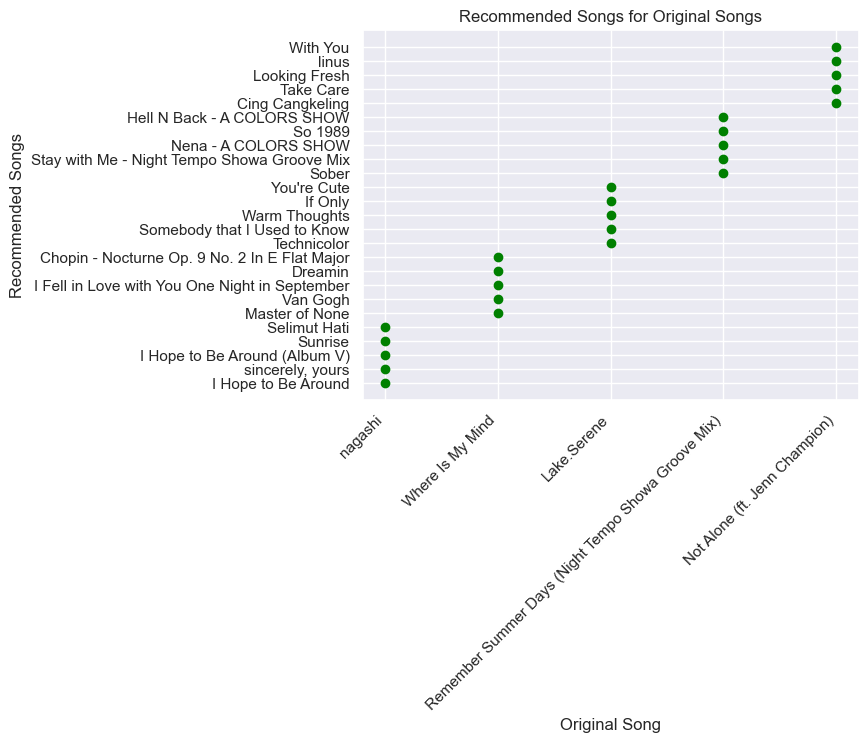

In [61]:
plt.scatter(recommendations_df['Original Song'], recommendations_df['Recommended Songs'], color='green')
plt.xlabel('Original Song')
plt.ylabel('Recommended Songs')
plt.title('Recommended Songs for Original Songs')
plt.xticks(rotation=45, ha='right')  # Mengatur rotasi dan posisi label sumbu x